<a href="https://colab.research.google.com/github/peisuke/ml-works/blob/main/7/7_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 7.1 主成分分析
- 目的
    - 主成分分析の実験を通して主成分のイメージを掴む
- 内容
    - 低次元の主成分分析
    - 高次元の主成分分析
- 参考
    - 本コードは以下のサイトを参考にしました
    - https://www.takapy.work/entry/2019/02/08/002738

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
%matplotlib inline

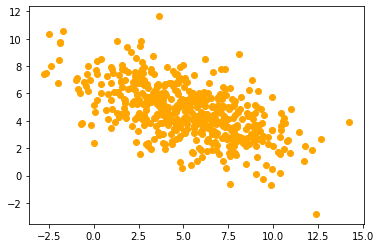

In [2]:
# データの生成
mu = [5, 5]
sigma = [[8, -3], [-3, 4]]
X = np.random.multivariate_normal(mu, sigma, 500)

# データをプロット
plt.scatter(X[:,0], X[:,1], c='orange')
plt.show()

In [3]:
# 主成分分析の実行（主成分を2本まで計算）
pca = PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

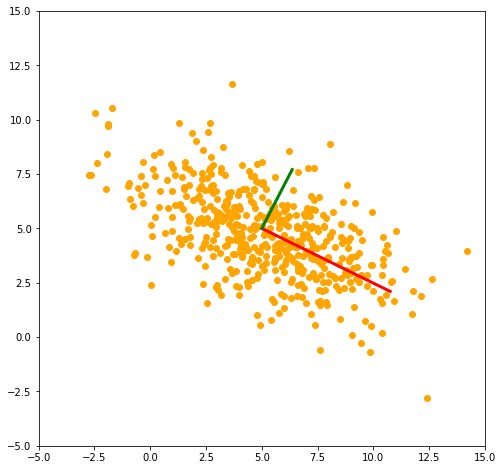

In [4]:

# 主成分の表示
# 長さはpca.explained_variance_の平方根、向きはpca.components_に含まれる
var = pca.explained_variance_
p0 = mu[0], mu[0] + pca.components_[0][0] * np.sqrt(var[0]) * 2
p1 = mu[1], mu[1] + pca.components_[0][1] * np.sqrt(var[0]) * 2
p2 = mu[0], mu[0] + pca.components_[1][0] * np.sqrt(var[1]) * 2
p3 = mu[1], mu[1] + pca.components_[1][1] * np.sqrt(var[1]) * 2

plt.figure(figsize=(8, 8))
plt.xlim(-5, 15)
plt.ylim(-5, 15)
plt.scatter(X[:,0], X[:,1], c='orange')
plt.plot(p0, p1, color="red", linewidth=3)
plt.plot(p2, p3, color="green", linewidth=3)
plt.show()

In [5]:
pca.components_[0], pca.components_[1]

(array([ 0.89307086, -0.44991604]), array([0.44991604, 0.89307086]))

<BarContainer object of 2 artists>

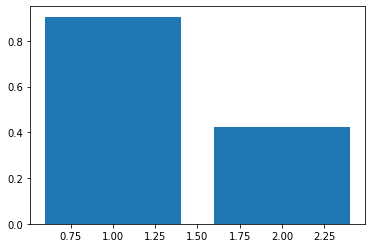

In [6]:
# 各成分の強さ
plt.bar([n for n in range(1, len(pca.explained_variance_ratio_)+1)], np.sqrt(pca.explained_variance_ratio_))

In [7]:
# データの読み込み
cancer = load_breast_cancer()
X_df = pd.DataFrame(data=cancer.data,columns=cancer.feature_names)
X_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [8]:
y = cancer.target

In [9]:
# 分散：１にスケーリング
scaler = StandardScaler()
scaler.fit(X_df)
X_scaled = scaler.transform(X_df)
X_scaled_df = pd.DataFrame(data=X_scaled,columns=cancer.feature_names)

In [10]:
# 元の特徴量と同じ数で主成分分析
pca = PCA(n_components=30)
pca.fit(X_scaled)

PCA(n_components=30)

<BarContainer object of 30 artists>

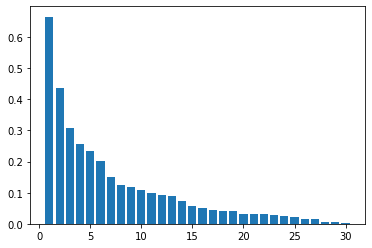

In [11]:
# 各成分の強さ
plt.bar([n for n in range(1, len(pca.explained_variance_ratio_)+1)], np.sqrt(pca.explained_variance_ratio_))